In [22]:
import numpy as np
import matplotlib.pylab as plt


(16384,)
image dimension = 128
power spectrum binning=0.04677216729723518
[0.         0.29387819 0.58775639 0.88163458 1.17551278 1.46939097
 1.76326917 2.05714736 2.35102555 2.64490375 2.93878194 3.23266014
 3.52653833 3.82041653 4.11429472 4.40817292 4.70205111 4.9959293
 5.2898075  5.58368569 5.87756389 6.17144208 6.46532028 6.75919847
 7.05307666 7.34695486 7.64083305 7.93471125 8.22858944 8.52246764]


/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide


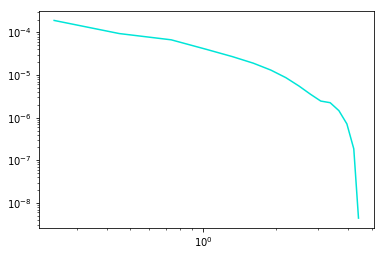

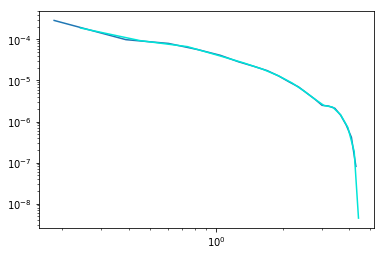

In [23]:
#### FILE PATH ##################
filenumber=0
L = 128   # Dimension of simulation box

path = "./num_" + str(filenumber) + ".npy"   # Path to the input file


#### LOAD DATA #################
data = np.load(path)

img = data[0]       


#plt.figure()
#plt.imshow(img)



######## FOURIER TRANSFORM OVERDENSITY FIELD ############
overdensity = img - np.ones(img.shape[0],dtype=float)*np.average(img)
    #print(overdensity.shape)

#TRY RFFT2 LATER

fft = np.fft.fft2(overdensity)
flat = fft.flatten()

print(flat.shape)

freqs = np.fft.fftfreq(img.shape[0])
#freqs.shape
#print(freqs)

dim = img.shape[0]
print("image dimension = " + str(dim))


##### SETTING BINNING PARAMETERS ##########
bin_dim = 30
binning = (np.amax(freqs)-np.amin(freqs))*np.sqrt(2)/bin_dim
print("power spectrum binning="+str(binning))


pow_spec = np.zeros(bin_dim)
cnt_spec = np.zeros(bin_dim)
k_spec = np.zeros(bin_dim)

#pow_comp = np.zeros(20)
#cnt_comp = np.zeros(20)
#k_comp = np.zeros(20)

freq_ax=np.arange(bin_dim)*binning*np.pi*2
print(freq_ax)


for i in range(0,dim):
        for j in range(0,dim):
              k_val = np.sqrt((freqs[i]-freqs[0])**2+(freqs[j]-freqs[0])**2) #### k_val is the magnitude of |k|
                
        #      print("i = " + str(i) + "  j= " + str(j) + "  distance = " + str(distance))
        #      print("binning result is " + str(int(distance/binning)) )
        #      print("binning freq is " + str(freq_ax[int(distance/binning)]))
        
              if int(k_val/binning)> (bin_dim-1) :  
                    print("k_value="+ str(distance) + ",error!")
              #elif distance == 0:
              #      print("distance=0!")
              elif np.digitize(k_val*np.pi*2,pk[:,0]) == 0:
                    continue
                 #   pow_comp[0]+=fft[i][j]*np.conj(fft[i][j])/(128*128*128*128)
                 #   cnt_comp[0]+=1
                    
              else:
                    pow_spec[int(k_val/binning)]+=fft[i][j]*np.conj(fft[i][j])/(L*L*L*L)
                    ## one L^2 is brought by Fourier Transformation, the other by Power spectra definition.
                    
                    
                    cnt_spec[int(k_val/binning)]+=1
                    k_spec[int(k_val/binning)]+=k_val*2*np.pi  
                    
                    ## The default numpy frequency is different from physical definition by a factor of 2*pi.
                    ## Thus we have to compensate it here.
                    
                    
                    
                    #pow_comp[np.digitize(k_val*np.pi*2,pk[:,0])-1]+=fft[i][j]*np.conj(fft[i][j])/(L*L*L*L)
                    #cnt_comp[np.digitize(k_val*np.pi*2,pk[:,0])-1]+=1
                    #k_comp[np.digitize(k_val*np.pi*2,pk[:,0])-1]+=distance*2*np.pi
                    


pow_spec = np.divide(pow_spec,cnt_spec)

#pow_comp = np.divide(pow_comp,cnt_comp)

k_spec = np.divide(k_spec,cnt_spec)


plt.loglog(k_spec,pow_spec,label="t="+str(times[k]),color=colors[k])

    
    
    
    
    
###  Double checking with Micheal's result #################   
pks = np.load('./Mic_data.npz')
pk = pks['i=0,j=0']
fig, ax = plt.subplots()
ax.plot(pk[:, 0], pk[:, 1])
ax.set(xscale='log', yscale='log')
ax.plot(k_spec,pow_spec,label="t="+str(times[k]),color=colors[k])
ax.plot(k_comp,pow_comp,label="t="+str(times[k]),color=colors[k])


In [6]:
times=[0.001,0.0015,0.0023,0.0036,0.0056,0.0087,0.0135,0.020,0.032,0.05]
from matplotlib.pyplot import figure
#plt.figure(figsize=(16,12))

colors=['#00E5D8','#04CBD5','#09B2D2','#0D98CF','#127FCC','#1665CA','#1B4CC7','#1F32C4','#2419C1','#2900BF']
